In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

(-0.2, 1.2)

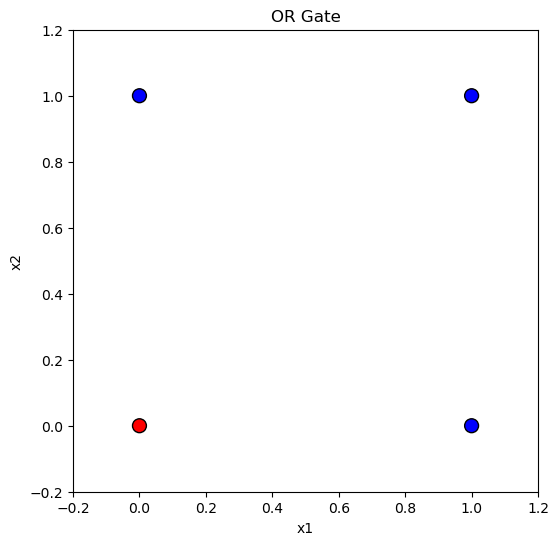

In [167]:
# OR 게이트 데이터
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.], [1.], [1.], [1.]])

x_vals = np.linspace(-0.2, 1.2, 100)
X_np = X.numpy()
y_np = y.numpy().flatten()
colors = ['red' if label == 0 else 'blue' for label in y_np]

plt.figure(figsize=(6, 6))
plt.scatter(X_np[:, 0], X_np[:, 1], c=colors, s=100, edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("OR Gate")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

Epoch 0, Loss: 0.6073
Epoch 100, Loss: 0.3366
Epoch 200, Loss: 0.2630
Epoch 300, Loss: 0.2145
Epoch 400, Loss: 0.1803
Epoch 500, Loss: 0.1551
Epoch 600, Loss: 0.1357
Epoch 700, Loss: 0.1204
Epoch 800, Loss: 0.1080
Epoch 900, Loss: 0.0979


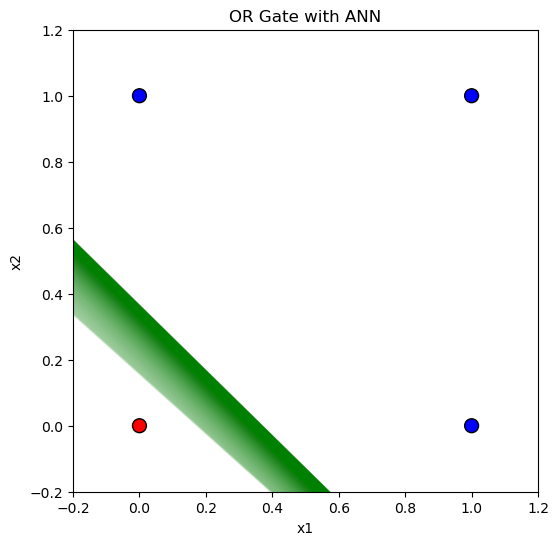

In [170]:
# 단일 퍼셉트론을 가진 ANN 모델
ANN = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

# 손실 함수, 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = optim.SGD(ANN.parameters(), lr=0.1)

# 영역을 나누기 위한 직선 파라미터 리스트
lines = []

# 학습 진행
for epoch in range(1000):
    optimizer.zero_grad()       # gradient 초기화
    output = ANN(X)
    loss = criterion(output, y) # BCELoss
    loss.backward()
    optimizer.step()        
    
    # 결과
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    
    # 각 에포크 별 직선의 파라미터 저장
    if epoch >= 300:
        w = ANN[0].weight[0].detach().numpy()
        b = ANN[0].bias[0].item()
        lines.append((w[0], w[1], b))
        
# 시각화
plt.figure(figsize=(6, 6))
plt.scatter(X_np[:, 0], X_np[:, 1], c=colors, s=100, edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("OR Gate with ANN")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

for w1, w2, b in lines:
    if w2 != 0:
        y_vals = -(w1 * x_vals + b) / w2
        plt.plot(x_vals, y_vals, 'green', alpha=0.05)

(-0.2, 1.2)

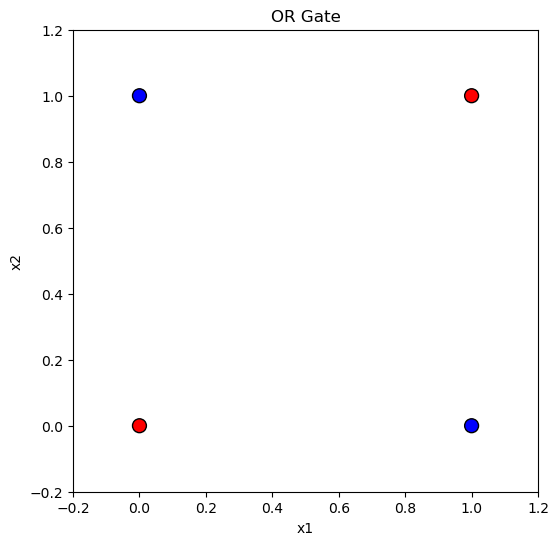

In [171]:
# XOR 게이트 데이터
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.], [1.], [1.], [0.]])

x_vals = np.linspace(-0.2, 1.2, 100)
X_np = X.numpy()
y_np = y.numpy().flatten()
colors = ['red' if label == 0 else 'blue' for label in y_np]

plt.figure(figsize=(6, 6))
plt.scatter(X_np[:, 0], X_np[:, 1], c=colors, s=100, edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("OR Gate")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

In [93]:
# 단일 퍼셉트론을 가진 ANN 모델
ANN = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)

# 손실 함수, 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = optim.SGD(ANN.parameters(), lr=0.1)

lines = []

# 학습 (0~1000 에포크 진행)
for epoch in range(1000):
    optimizer.zero_grad()
    output = ANN(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    
    # 결과
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")
    
    # 직선을 위한 파라미터 저장
    if epoch >= 300:
        w = ANN[0].weight[0].detach().numpy()
        b = ANN[0].bias[0].item()
        lines.append((w[0], w[1], b))

Epoch 0, Loss: 0.6973
Epoch 100, Loss: 0.6944
Epoch 200, Loss: 0.6936
Epoch 300, Loss: 0.6933
Epoch 400, Loss: 0.6932
Epoch 500, Loss: 0.6932
Epoch 600, Loss: 0.6932
Epoch 700, Loss: 0.6932
Epoch 800, Loss: 0.6931
Epoch 900, Loss: 0.6931


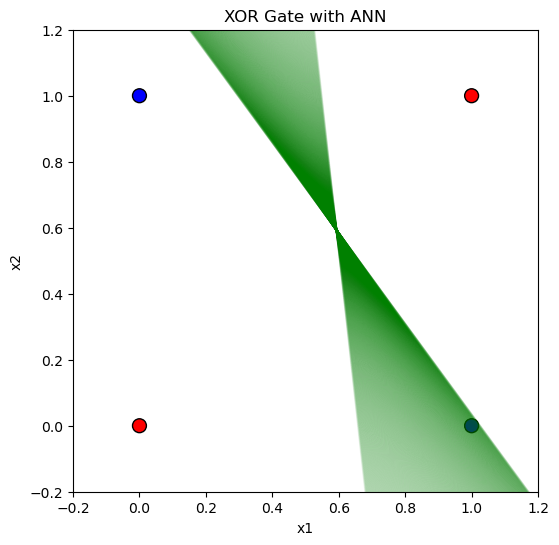

In [94]:
plt.figure(figsize=(6, 6))
plt.scatter(X_np[:, 0], X_np[:, 1], c=colors, s=100, edgecolors='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Gate with ANN")
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

for w1, w2, b in lines:
    if w2 != 0:
        y_vals = -(w1 * x_vals + b) / w2
        plt.plot(x_vals, y_vals, 'green', alpha=0.05)

Epoch 0, Loss: 0.7088
Epoch 100, Loss: 0.6849
Epoch 200, Loss: 0.6586
Epoch 300, Loss: 0.4216
Epoch 400, Loss: 0.1119
Epoch 500, Loss: 0.0594
Epoch 600, Loss: 0.0394
Epoch 700, Loss: 0.0295
Epoch 800, Loss: 0.0233
Epoch 900, Loss: 0.0193


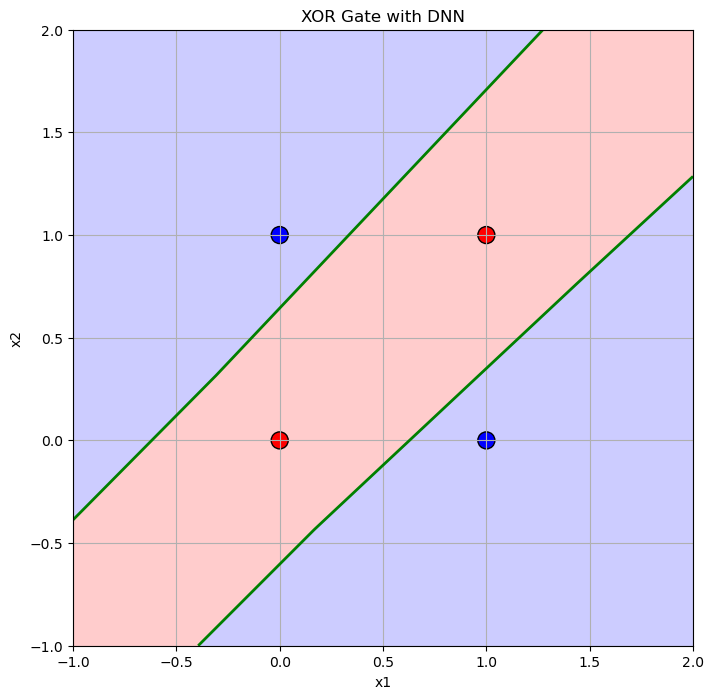

In [165]:
# 다층 퍼셉트론 DNN 모델
DNN = nn.Sequential(
    nn.Linear(2, 8),      # 입력층 -> 은닉층1
    nn.ReLU(),
    nn.Linear(8, 6),      # 은닉층1 -> 은닉층2
    nn.ReLU(),
    nn.Linear(6, 4),      # 은닉층2 -> 은닉층3
    nn.ReLU(),
    nn.Linear(4, 1),      # 은닉층3 -> 출력층
    nn.Sigmoid()
)

# 손실 함수, 옵티마이저 설정
criterion = nn.BCELoss()
optimizer = optim.SGD(DNN.parameters(), lr=0.1)

# 학습 (0~1000 에포크 진행)
for epoch in range(1000):
    optimizer.zero_grad()
    output = DNN(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    
    # 결과
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# 결정 경계 시각화를 위한 grid 생성
xx, yy = np.meshgrid(np.linspace(-1, 2, 400),
                     np.linspace(-1, 2, 400))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# 예측값 계산
with torch.no_grad():
    zz = DNN(grid).reshape(xx.shape).numpy()

# XOR Gate 데이터
X_np = X.numpy()
y_np = y.numpy().flatten()
colors = ['red' if label == 0 else 'blue' for label in y_np]

# 시각화
plt.figure(figsize=(8, 8))

# Sigmoid 예측값 기반 영역 색칠
plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['red', 'blue'], alpha=0.2)

# 학습 종료 시 경계선
plt.contour(xx, yy, zz, levels=[0.5], colors='green', linewidths=2)

# 학습 데이터 시각화
plt.scatter(X_np[:, 0], X_np[:, 1], c=colors, s=150, edgecolors='k')

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("XOR Gate with DNN")
plt.xlim(-1, 2)
plt.ylim(-1, 2)
plt.grid(True)
plt.show()